# Transients
- **Short Duration:** Transients are brief compared to the overall length of the signal.
- **High Amplitude Variation:** Transients involve rapid changes in amplitude.

Transients typically contain a wide range of frequencies, making them broadband in nature. Unlike steady-state signals, transients may not have consistent statistical properties over time. In audio context, transients are components that significantly affect the perceived quality and clarity of sound. They are often the **initial attack phase** of a sound, such as the initial samples in a kick drum or consonants in speech.

### Detection
Transients can be detected and analyzed using:

- **Time-Domain Methods:** examinine the signal's amplitude variations over time.
- **Frequency-Domain Methods:** Fourier Transform and STFT to observe spectral changes during the transient.
- **Time-Frequency Representations:** Wavelet Transform, Wigner-Ville Distribution

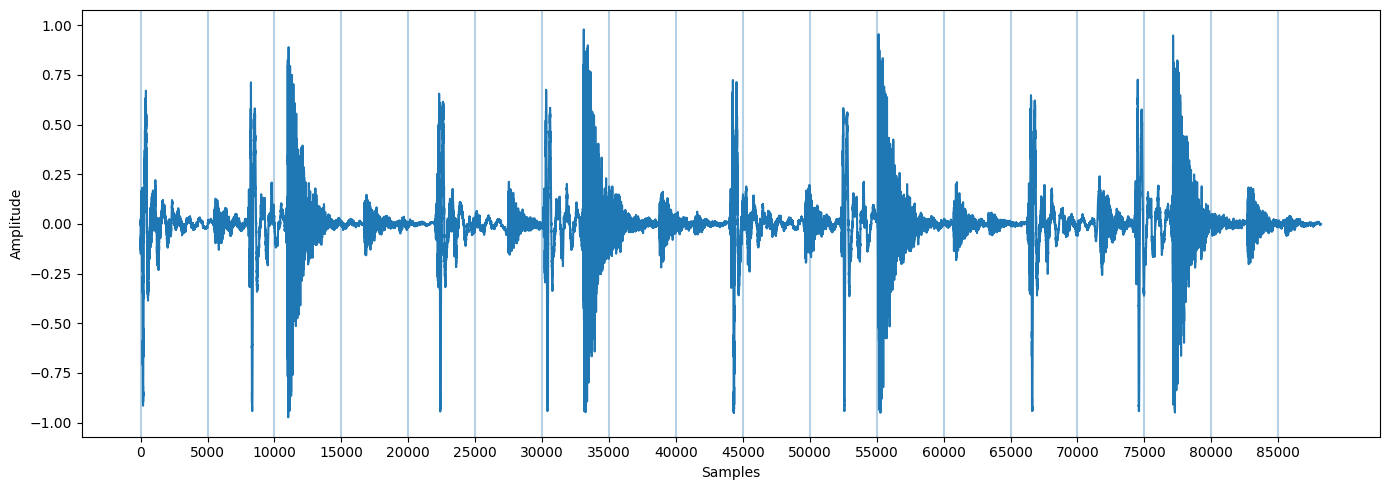

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.fftpack import fft

audio, sr = librosa.load('data/wav-loops/its_0_drum_full_loop.wav')

plt.figure(figsize=(14, 5))
plt.plot(audio)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

ticks = np.arange(0, len(audio), step=5000) # Arbitrary steps for slicing
for t in ticks:
    plt.axvline(x=t, alpha=0.333)

plt.xticks(ticks)

plt.tight_layout()
plt.show()

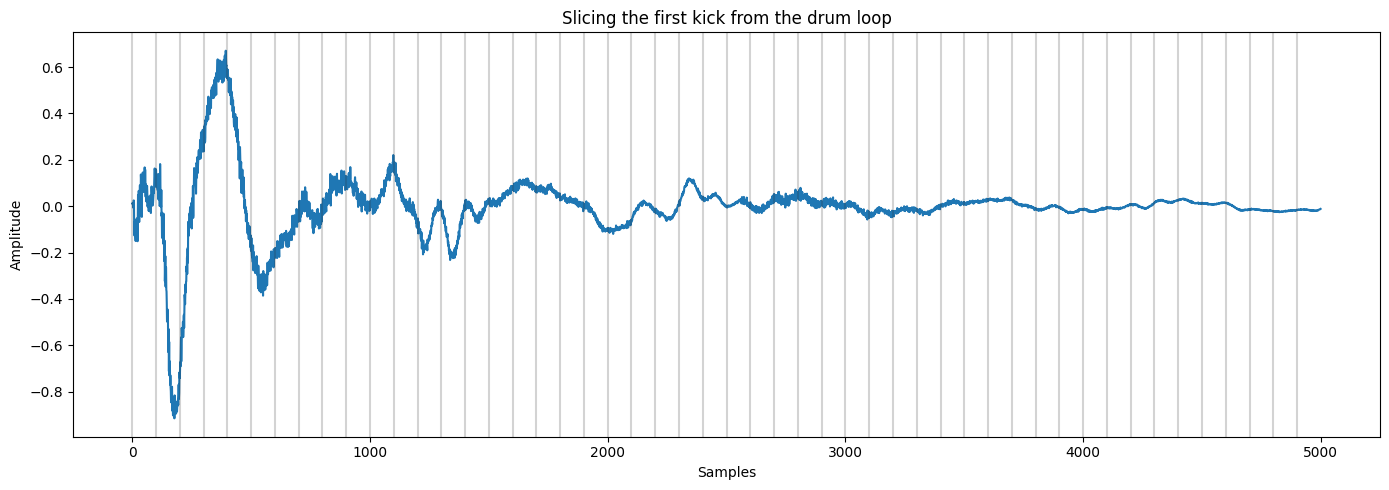

In [17]:
def plot_slice(signal, title):
    plt.figure(figsize=(14, 5))
    plt.plot(audio[0:5000])
    ticks = np.arange(0, len(signal), step=len(signal)/50)
    for t in ticks:
        plt.axvline(x=t, alpha=0.2, color='#262626')

    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

plot_slice(audio[0:5000], "Slicing the first kick from the drum loop")

## Detecting transients (energy-based method)

Simply finding the frame with the maximum energy, which we will assume to be the transient

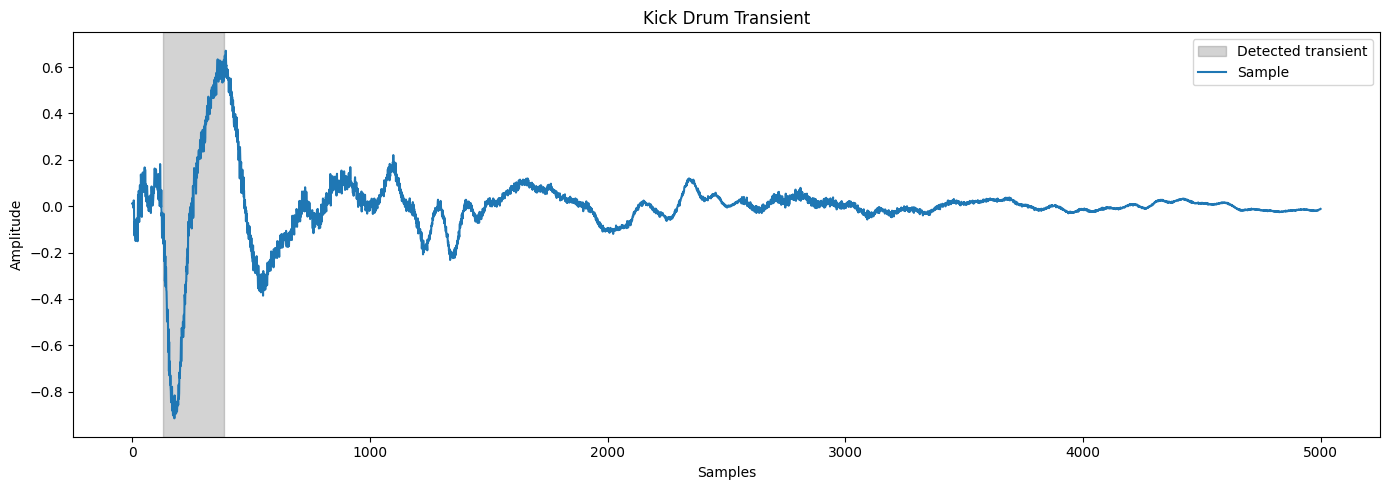

In [25]:
kick = audio[0:5000]

frame_size = 256
hop_length = 128

def detect_transient(signal, name):
    energy = np.array([sum(abs(signal[i:i+frame_size]**2)) for i in range(0, len(signal), hop_length)])

    max_energy_frame = np.argmax(energy)
    start = max_energy_frame * hop_length
    end = start + frame_size

    transient = signal[start:end]

    plt.figure(figsize=(14, 5))
    plt.axvspan(start,end, alpha=0.2, label="Detected transient", color="#262626")
    plt.plot(signal, label='Sample')
    plt.title(f'{name} Transient')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return transient

kick_transient = detect_transient(kick, 'Kick Drum')

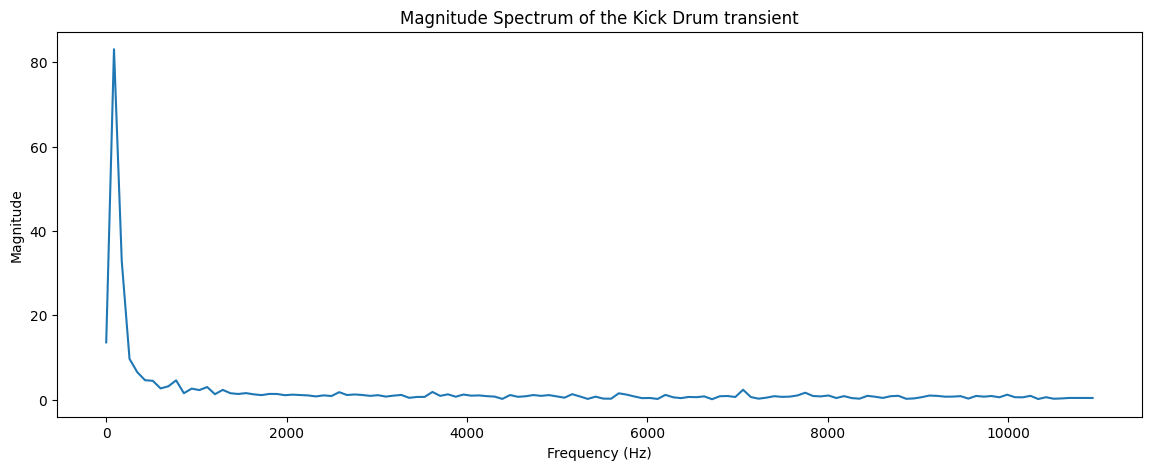

In [23]:
def get_mag_spectrum(transient, name):
    transient_fft = fft(transient)
    frequencies = np.fft.fftfreq(len(transient), d=1/sr)
    magnitude = np.abs(transient_fft)

    plt.figure(figsize=(14, 5))
    plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
    plt.title(f'Magnitude Spectrum of the {name} transient')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()

get_mag_spectrum(kick_transient, 'Kick Drum')

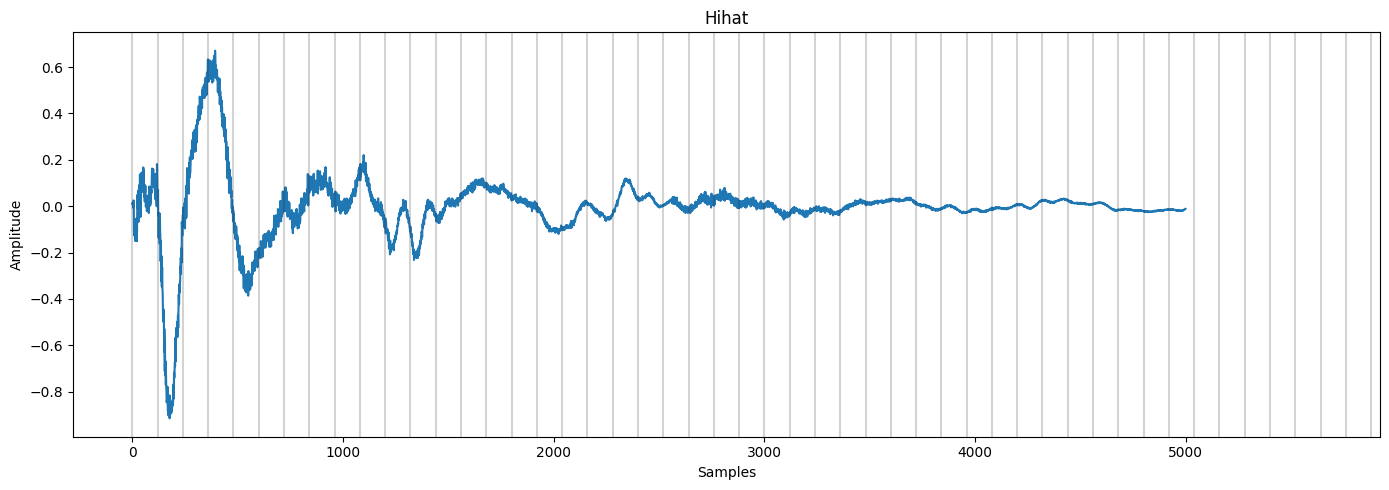

In [27]:
hihat = audio[15000:21000]
plot_slice(hihat, 'Hihat')

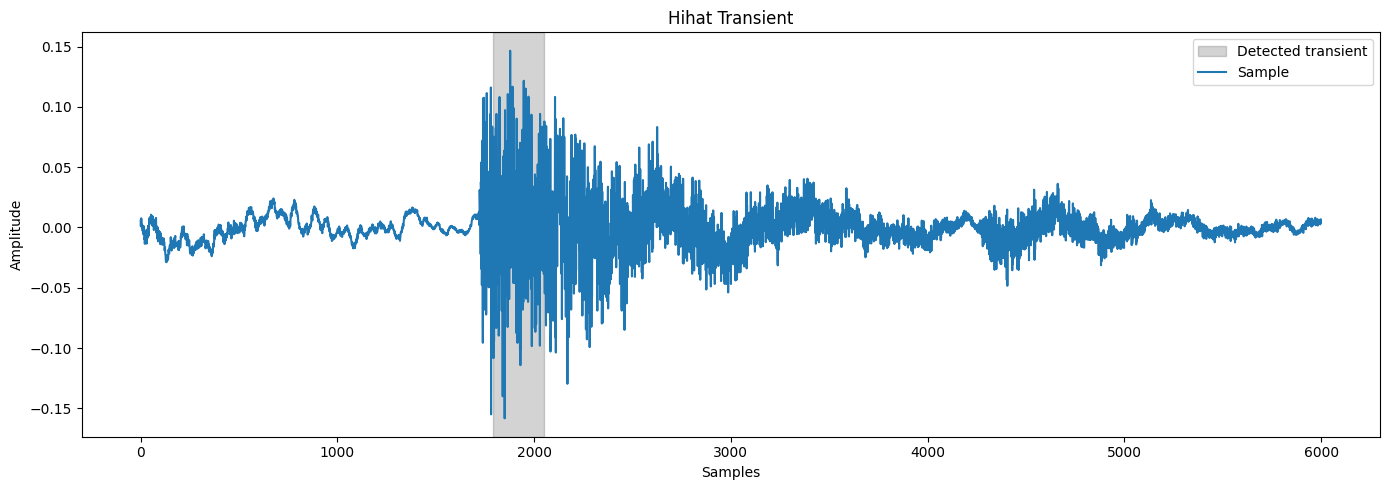

In [28]:
hihat_transient = detect_transient(hihat, 'Hihat')

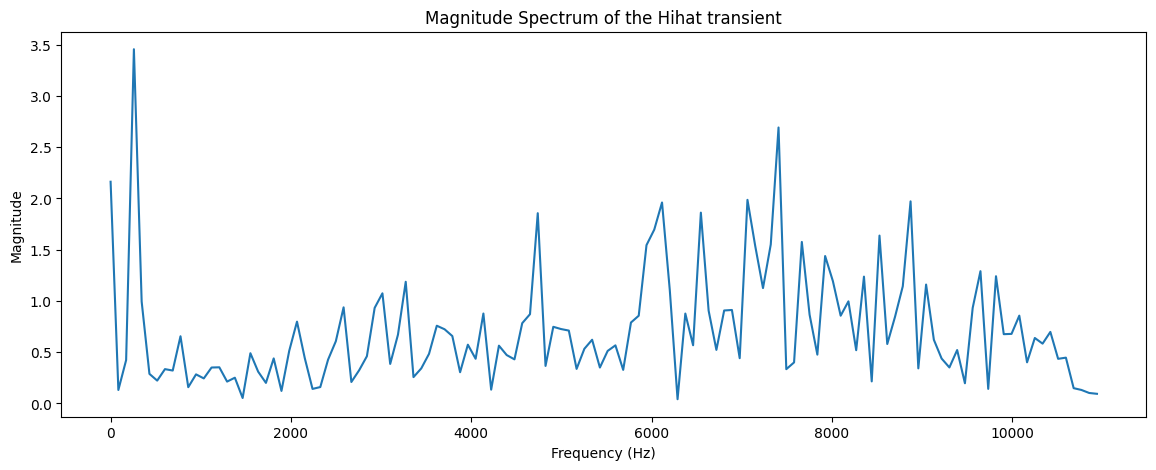

In [30]:
get_mag_spectrum(hihat_transient, 'Hihat')